In [1]:
%matplotlib inline
#%matplotlib inline will lead to static images of your plot embedded in the notebook

import pandas as pd
import matplotlib.pyplot as plt
#matplotlib.pyplot is a state-based interface to matplotlib

import folium
#folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map.
#It enables both the binding of data to a map for choropleth visualizations as well as passing rich 
#vector/raster/HTML visualizations as markers on the map.

import numpy as np
import seaborn as sns
import geopandas
#GeoPandas is an open source project to make working with geospatial data in python easier.
#GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

import plotly.express as px
#Plotly Express is a new high-level Python visualization library: it’s a wrapper for Plotly.py that 
#exposes a simple syntax for complex charts

In [3]:
#Using pandas to read the csv file and encoding the file to ISO-88590-1
#ISO-8859 is a family of single-byte encoding schemes used to represent alphabets that can be 
#represented within the range of 127 to 255. 
#ISO-8859-1: 8 bits. 256 code points.

df = pd.read_csv(r"C:\Users\Dell\Documents\Amazon\amazon.csv", encoding = "ISO-8859-1")
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
#creating a dictionary with translations of months
month_map={'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 'Maio': 'May',
          'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October',
          'Novembro': 'November', 'Dezembro': 'December'}

#mapping our translated months
df['month']=df['month'].map(month_map)
df.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [5]:
#Creating a pivot to get the total number of fires and the year
#Pivot table - create a spreadsheet-style pivot table as a DataFrame.
#Levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index 
#and columns of the result DataFrame.
#aggfunc : function, default numpy.mean, or list of functions If list of functions passed, the 
#resulting pivot table will have hierarchical columns whose top level are the function names
#(inferred from the function objects themselves)

pivot1 = pd.pivot_table(df,values="number",index=["year"],aggfunc=np.sum)
pivot1.head()

,number
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600


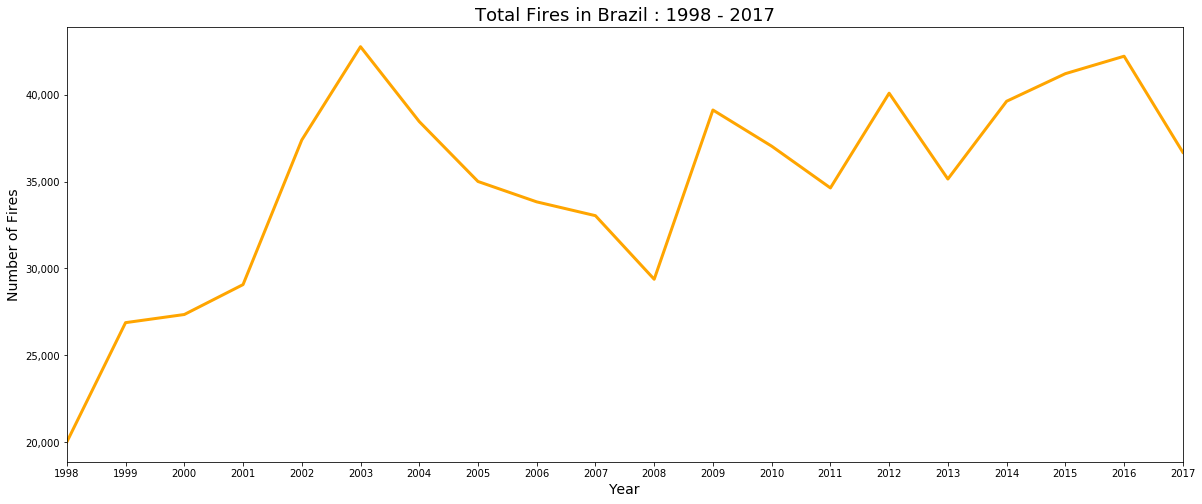

In [6]:
from matplotlib.pyplot import MaxNLocator, FuncFormatter
#MaxNLocator-Finds up to a max number of intervals with ticks at nice locations.
#FuncFormatter-User defined function sets the labels.

plt.figure(figsize=(20,8))

#ax-The default formatter identifies when the x-data being plotted is a small range on top of a large offset.
##Show experimental replicates instead of aggregating:
ax = sns.lineplot(x = pivot1.index, y = 'number', data = pivot1, estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None)

plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

#MaxNLocator:
ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

In [7]:


# Fires increased dramatically in the last 20 years, from 20,000 in 1998 to almost double in 2017. 
# What's also alarming is that there is also an increasing trend in the data, 
# so we can expect even more wildfires in the years to follow.

# 2003 and 2016 had the most wildfires throughout Brazil.



In [8]:
#Creating another pivot to plot the number of fires by month
pivot2 = pd.pivot_table(df,values="number",index=["month"],aggfunc=np.sum)
pivot2.head()

,number
month,
April,28188.770
August,88050.435
December,57535.480
February,30848.050
January,47747.844


In [9]:
# Sorting by months chronologically
meses = df['month'].unique()
pivot2 = pivot2.reindex(meses)
pivot2

,number
month,
January,47747.844
February,30848.050
March,30717.405
April,28188.770
May,34731.363
June,56010.675
July,92326.113
August,88050.435
September,58578.305


Text(0.5, 1.0, 'Fire vs Month')

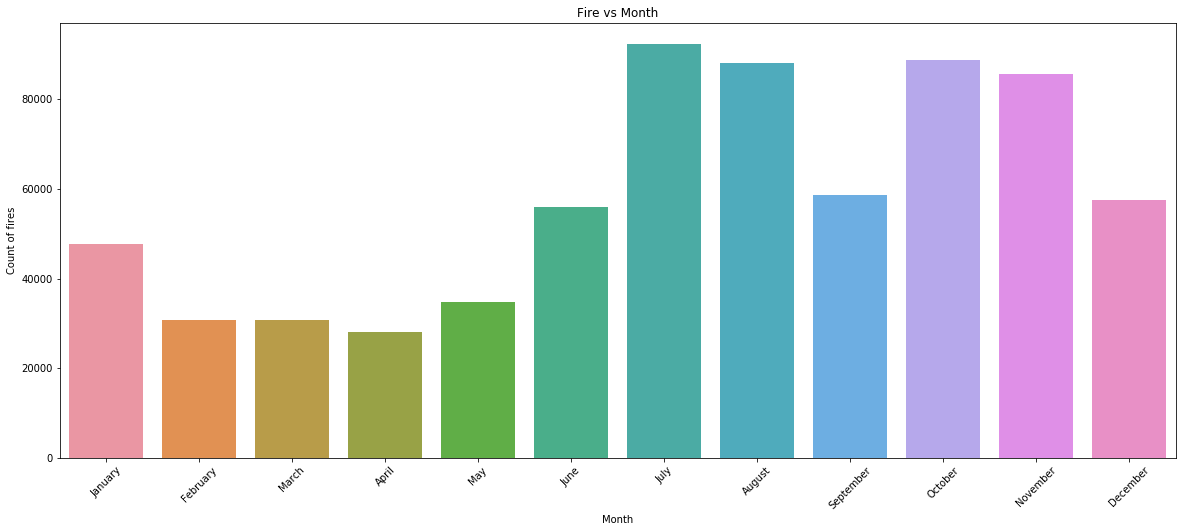

In [10]:
# Total burnings reported in Brazil from 1998 to 2017 by months
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=pivot2.index, y="number", data=pivot2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Month")
plt.ylabel("Count of fires")
plt.title("Fire vs Month")

In [11]:
# The following analysis can be drawn from the plot:

# 1. February, March, April and May see the lowest number of forest fires
# 2. A sudden spike in June continuing the trend till November
# 3. July, August, October and November are the 4 months where maximum forest fires happen

In [12]:
#Creating another pivot to plot the fires by state
pivot3 = pd.pivot_table(df,values="number",index=["state"],aggfunc=np.sum)
pivot3.head()

,number
state,
Acre,18464.030
Alagoas,4644.000
Amapa,21831.576
Amazonas,30650.129
Bahia,44746.226


Text(0.5, 1.0, 'Total burnings reported in Brazil from 1998 to 2017 by States')

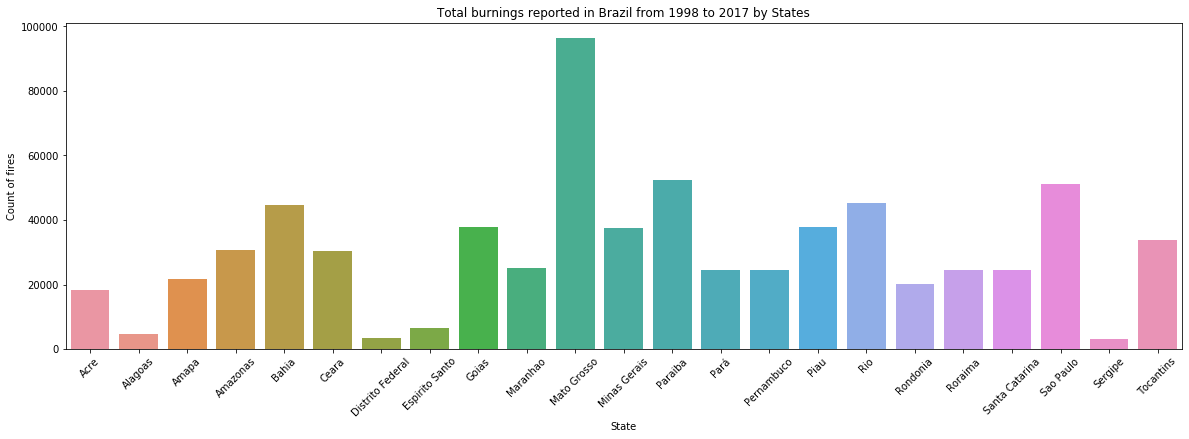

In [13]:
#Plotting the graph
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=pivot3.index, y="number", data=pivot3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("State")
plt.ylabel("Count of fires")
plt.title("Total burnings reported in Brazil from 1998 to 2017 by States")

In [14]:
# The following analysis can be drawn from the plot:

# 1. Mato Grosso see a huge number of forest fires
# 2. Sergipe, Distrito Federal, Alagoas and Espirito Santo see the lowest number of forest fires

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



Text(114.0, 0.5, 'Year')

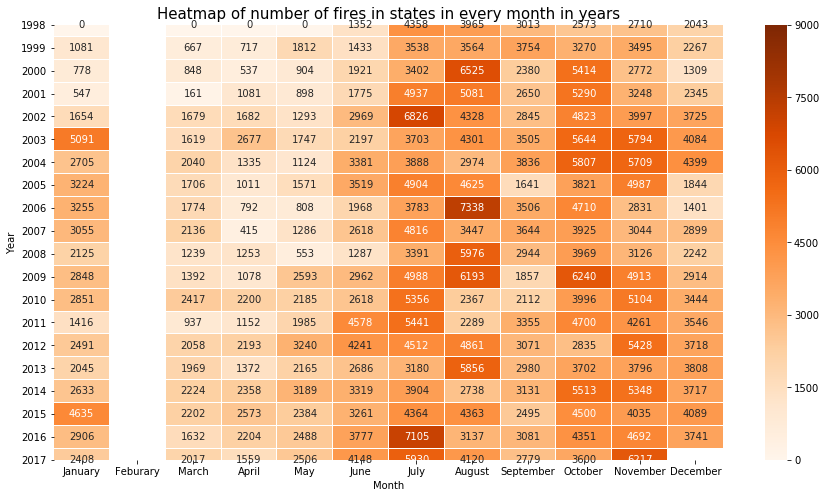

In [15]:
data_pivot = df.pivot_table(values='number', index='year', columns='month', aggfunc=np.sum)
data_pivot = data_pivot.loc[:,['January', 'Feburary', 'March', 'April', 'May', 'June', 'July','August','September', 'October', 'November', 'December']]

plt.figure(figsize=(15,8))
sns.heatmap(data_pivot, linewidths=0.05, vmax=9000, cmap='Oranges', fmt="1.0f", annot=True)
plt.title('Heatmap of number of fires in states in every month in years', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Year')